# Beacon trajectories, before touching border 

## This script is desgined to find trajectories that are x seconds from before the beacon and has not touched the border fo the arena - in order to quantify how many path could we actually rely on with Path integration. 


### 1. import trajctories- index and seperate them based on beacons - from previous notebook 


In [2]:
import math
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

root = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Data/Raw/'
figures = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Figures/'

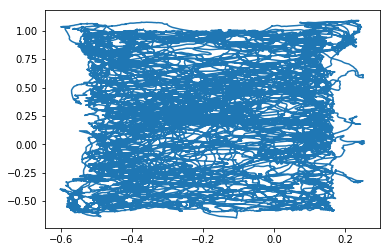

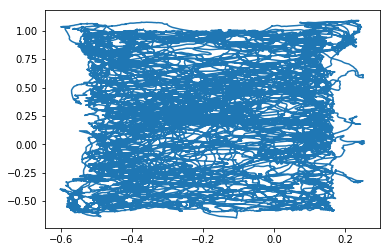

In [3]:
Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

beacon_Day86_fs2 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)
beacon_Day86_fs1 = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)

beacon_data = beacon_Day86_fs1
position_data = Day86_fs1
def rotation_correction(position_data):
    alpha = (5) * np.pi / 180
    rot_position_data = position_data
    rot_position_data[1] = position_data[1] * np.cos(alpha) - position_data[3] * np.sin(alpha)
    rot_position_data[3] = position_data[1] * np.sin(alpha) + position_data[3] * np.cos(alpha)
    return rot_position_data
rot_position_data = rotation_correction(position_data)
plt.plot(position_data[1],position_data[3])
plt.show()
plt.plot(rot_position_data[1],rot_position_data[3])
plt.show()

In [5]:
def get_index (beacon_data, position_data):
    """get indexes of beacons and compare to positions """
    enum = list(np.arange(0,len(beacon_data [0]),1))
    index=[]
    beacon_times = np.array(beacon_data[0])
    for i in enum:
        index.append(np.abs(beacon_times[i]-np.array(position_data[0])).argmin() )
    return index ,enum


In [6]:
def position_before_beacon_trigger_beacon(seconds_back, beacon_data, position_data):
    """Take beacon data and retuns XY and Time array defined in seconds before beacon """
    x_list=[]
    y_list=[]
    time_list=[]
    index, enum  = get_index(beacon_data, position_data)
    for index, (i, e) in enumerate(zip(index, enum)):
        x_list.append((position_data[1][i-(seconds_back*100):i]))
        y_list.append((position_data[3][i-(seconds_back*100):i]))
        time_list.append((position_data[0][i-(seconds_back*100):i]))
        #print (beacon_data[4][e],beacon_data[5][e],beacon_data[1][e],beacon_data[3][e],position_data[1][i], position_data[2][i] )
    #make normalized np arrays
    norm_x = np.asarray(x_list)
    norm_y = np.asarray(y_list)
    norm_time = np.asarray(time_list)
    return norm_x,norm_y,norm_time

In [97]:
# first make an array then index into it and generalize 
def position_before_beacon_trigger_beacon_array(seconds_back, beacon_data, position_data):
    """Take beacon data and returns XY and Time array defined in seconds before beacon """
    x_list=[]
    y_list=[]
    time_list=[]
    t,w,h = 35,200,3;
    beacon_travel=([[0 for x in range(w)] for y in range(h)])
    beacon_travel = np.asarray(beacon_travel)
    beacon_travel2=[]
    print (beacon_travel.shape)
    index, enum  = get_index(beacon_data, position_data)
    for index, (i, e) in enumerate(zip(index, enum)):
        x_list.append(position_data[1][i-(seconds_back*100):i])
        y_list.append(position_data[3][i-(seconds_back*100):i])
        time_list.append(position_data[0][i-(seconds_back*100):i])
        print(len((x_list)[0]))
        k= np.asarray((time_list[0],x_list[0],y_list[0],))
        k= k.reshape((3,200))
        #k = ((position_data[0][i-(seconds_back*100):i]),(position_data[1][i-(seconds_back*100):i]),(position_data[3][i-(seconds_back*100):i]))
        #k=np.asarray(k)
        print(k.shape)
        beacon_travel2.append(np.stack((k)))
        x_list=[]
        y_list=[]
        time_list=[]
        print(np.asarray(beacon_travel2).shape)
 #make normalized np arrays
    norm_x = np.asarray(x_list)#.reshape(len(enum),seconds_back*100)
    norm_y = np.asarray(y_list)
    norm_time = np.asarray(time_list)
    return np.asarray(beacon_travel2)
beacon_travel= position_before_beacon_trigger_beacon_array(2, beacon_data, position_data)

(3, 200)
200
(3, 200)
(1, 3, 200)
200
(3, 200)
(2, 3, 200)
200
(3, 200)
(3, 3, 200)
200
(3, 200)
(4, 3, 200)
200
(3, 200)
(5, 3, 200)
200
(3, 200)
(6, 3, 200)
200
(3, 200)
(7, 3, 200)
200
(3, 200)
(8, 3, 200)
200
(3, 200)
(9, 3, 200)
200
(3, 200)
(10, 3, 200)
200
(3, 200)
(11, 3, 200)
200
(3, 200)
(12, 3, 200)
200
(3, 200)
(13, 3, 200)
200
(3, 200)
(14, 3, 200)
200
(3, 200)
(15, 3, 200)
200
(3, 200)
(16, 3, 200)
200
(3, 200)
(17, 3, 200)
200
(3, 200)
(18, 3, 200)
200
(3, 200)
(19, 3, 200)
200
(3, 200)
(20, 3, 200)
200
(3, 200)
(21, 3, 200)
200
(3, 200)
(22, 3, 200)
200
(3, 200)
(23, 3, 200)
200
(3, 200)
(24, 3, 200)
200
(3, 200)
(25, 3, 200)
200
(3, 200)
(26, 3, 200)
200
(3, 200)
(27, 3, 200)
200
(3, 200)
(28, 3, 200)
200
(3, 200)
(29, 3, 200)
200
(3, 200)
(30, 3, 200)
200
(3, 200)
(31, 3, 200)
200
(3, 200)
(32, 3, 200)
200
(3, 200)
(33, 3, 200)
200
(3, 200)
(34, 3, 200)
200
(3, 200)
(35, 3, 200)


In [98]:
beacon_travel.shape

(35, 3, 200)

[1 3 6]


In [42]:
# first make an array then index into it and generalize 
def position_before_beacon_trigger_beacon_array(seconds_back, beacon_data, position_data):
    """Take beacon data and returns XY and Time array defined in seconds before beacon """
    l=[()]
    index, enum  = get_index(beacon_data, position_data)
    l=((position_data[0][index[0]-(seconds_back*100):index[0]]),(position_data[1][index[0]-(seconds_back*100):index[0]]),(position_data[3][index[0]-(seconds_back*100):index[0]]))
    l=np.asarray(l)
    for index, (i, e) in enumerate(zip(index, enum)):
        #i+=1
        #k = np.dstack((l,((position_data[0][i-(seconds_back*100):i]),(position_data[1][i-(seconds_back*100):i]),(position_data[3][i-(seconds_back*100):i]))))
    print(l.shape)
    print(l[1][1])
    return l
l1 = position_before_beacon_trigger_beacon_array(2, beacon_data, position_data)

IndentationError: expected an indented block (<ipython-input-42-f838d8fbe80c>, line 11)

In [160]:
l2 = l1.T

res3d = np.array([l2, l2, l2, l2])
res3d.shape

(4, 200, 3)

In [161]:
res3d[0]

array([[ 1.58022119e+09,  1.35955812e-01,  1.81727954e-01],
       [ 1.58022119e+09,  1.37256673e-01,  1.75162023e-01],
       [ 1.58022119e+09,  1.37727179e-01,  1.69949666e-01],
       [ 1.58022119e+09,  1.38479273e-01,  1.65010376e-01],
       [ 1.58022119e+09,  1.39220081e-01,  1.59295594e-01],
       [ 1.58022119e+09,  1.37908186e-01,  1.52521274e-01],
       [ 1.58022119e+09,  1.37671838e-01,  1.45641748e-01],
       [ 1.58022119e+09,  1.36515350e-01,  1.38682102e-01],
       [ 1.58022119e+09,  1.36053081e-01,  1.31782931e-01],
       [ 1.58022119e+09,  1.35344630e-01,  1.28466679e-01],
       [ 1.58022119e+09,  1.33273735e-01,  1.22745910e-01],
       [ 1.58022119e+09,  1.29414035e-01,  1.18062576e-01],
       [ 1.58022119e+09,  1.25680658e-01,  1.11018433e-01],
       [ 1.58022119e+09,  1.21391147e-01,  1.04484914e-01],
       [ 1.58022119e+09,  1.17232779e-01,  9.74779829e-02],
       [ 1.58022119e+09,  1.14031958e-01,  9.15573843e-02],
       [ 1.58022119e+09,  1.10877977e-01

In [27]:
norm_x,norm_y,norm_time=position_before_beacon_trigger_beacon(3,beacon_data,rot_position_data)

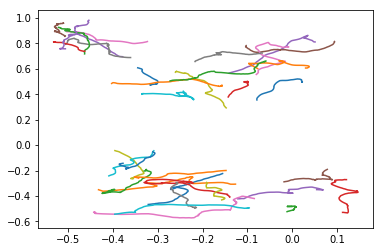

In [13]:
for i in np.arange(len(norm_x)):
    
    plt.plot(norm_x[i],norm_y[i])

### 2. Correct for Alpha , find borders for cut off 2*X and 2*Y  
Arena is 70cm by 166 cm - end rat whiskers can reach 10 cm from the tracker to the wall - so need to make it 50 cm by 144cm 

In [7]:
list_of_days = [Day79_fs1,Day80_fs1,Day81_fs1,Day82_fs1,Day83_fs1,Day84_fs1,Day85_fs1,Day86_fs1,Day87_fs1,Day88_fs1,Day89_fs1,Day90_fs1]
list_of_days2 = [Day79_fs2,Day80_fs2,Day81_fs2,Day82_fs2,Day83_fs2,Day84_fs2,Day85_fs2,Day86_fs2,Day87_fs2,Day88_fs2,Day89_fs2,Day90_fs2]
Day_number_list =['79','80','81','82','83','84','85','86','87','88','89','90']

## Alpha correction

## 3. Find Borders - look at overall representation of place - hard to tell due to rearing - more in Height distribution notebook also fro X adn Y over sessions 


#### Above is the numerical representation of the histogram graphs from above - Y dist is much longer than expected 70cm vs 99 and y also but by much less 182 vs 166  - beacue i took absolute minimums and that inluded the time when puttign the rat in and as well as taking it out
out. Not reliant information whenI can just measure and cut 

#### Establish cut-off's

In [ ]:
X_cut_min = -.5
Y_cut_max = 1
X_cut_max = .11
Y_cut_min = -.5

### 5. Quantify trajectories - make a numpy array with one which make it through the filter - not the right approach beacue need ot define the time of the trajectory everytime

5


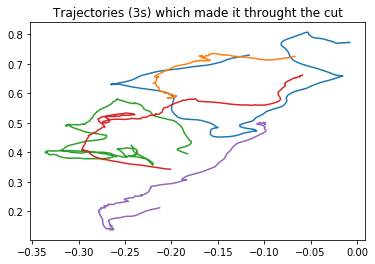

In [30]:
X_cut_min = -.5
Y_cut_max = 1
X_cut_max = .11
Y_cut_min = -.5
cut = .1  #in meters
count = 0
for i in np.arange(len(norm_x)):
    if max(norm_y[i])<(Y_cut_max-cut) and max(norm_x[i])<(X_cut_max-cut)and min(norm_y[i])>(Y_cut_min+cut)and min(norm_x[i])>(X_cut_min+cut):
        count +=1
        plt.plot(norm_x[i],norm_y[i])
        plt.title("Trajectories (3s) which made it throught the cut")
print(count)

### 5.Make a slidign window function which shows a histogram of %of beacons and distance away from the  - border - still need to break it and analyze the lenght of each trajectory before it hit the wall - easier way to do it then then looking within 5 sec. 


#### Here for visualizatio max and min shoudl be in absolute but it works fine like this 

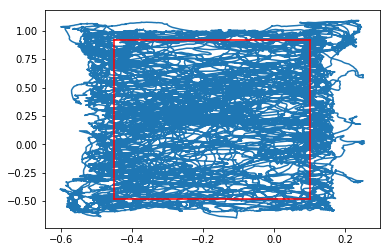

array([ 0.        ,  2.        , 42.85714286])

In [83]:
Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

beacon_Day86_fs2 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)
beacon_Day86_fs1 = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)

beacon_data = beacon_Day86_fs1
position_data = Day86_fs1

X_cut_min = -.45
Y_cut_max = .92
X_cut_max = .10
Y_cut_min = -.48

def Borderless_histogram (position_data,beacon_data,cut=0,seconds_back = 3 ):
    
    rot_position_data =  rotation_correction(position_data)
    
    norm_x,norm_y,norm_time = position_before_beacon_trigger_beacon(seconds_back, beacon_data, rot_position_data)

    
    plt.plot(rot_position_data[1],rot_position_data[3])
    plt.plot([(X_cut_min+cut),(X_cut_max-cut)],[(Y_cut_max-cut),(Y_cut_max-cut)] ,'r-')
    plt.plot([(X_cut_min+cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
    plt.plot([(X_cut_max-cut),(X_cut_max-cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
    plt.plot([(X_cut_max-cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_min+cut)] ,'r-')
    plt.show()
    
    count=0
    for i in np.arange(len(norm_x)):
        if max(norm_y[i])<(Y_cut_max-cut) and max(norm_x[i])<(X_cut_max-cut)and min(norm_y[i])>(Y_cut_min+cut)and min(norm_x[i])>(X_cut_min+cut):
            count +=1
    percentage = count/len(norm_x)*100
    return (cut,seconds_back,percentage)
np.asarray(Borderless_histogram(position_data,beacon_data,cut=0,seconds_back=2))

#### Still need to convert it such that I get the sequence before a border is reached not in seconds - so neeed to modify the position before beacon trigger function to not do it based on time, but rather location 

In [ ]:
def position_before_beacon_without_border(seconds_back, beacon_data, position_data):
    x_list=[]
    y_list=[]
    time_list=[]
    index, enum  = get_index(beacon_data, position_data)
    for index, (i, e) in enumerate(zip(index, enum)):
        #TODO If statement to collect trajecotry based on time cut off - or find time when iff happens and then cut off 
        #
        if max(norm_y[i])<(Y_cut_max-cut) and max(norm_x[i])<(X_cut_max-cut)and min(norm_y[i])>(Y_cut_min+cut)and min(norm_x[i])>(X_cut_min+cut):
        x_list.append((position_data[1][i-(seconds_back*100):i]))
        y_list.append((position_data[3][i-(seconds_back*100):i]))
        time_list.append((position_data[0][i-(seconds_back*100):i]))
        #print (beacon_data[4][e],beacon_data[5][e],beacon_data[1][e],beacon_data[3][e],position_data[1][i], position_data[2][i] )
    #make normalized np arrays
    norm_x = np.asarray(x_list)
    norm_y = np.asarray(y_list)
    norm_time = np.asarray(time_list)
    return norm_x,norm_y,norm_time
position_before_beacon_without_border()

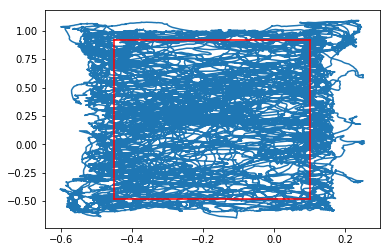

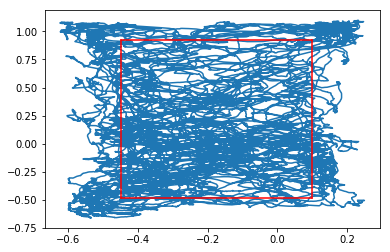

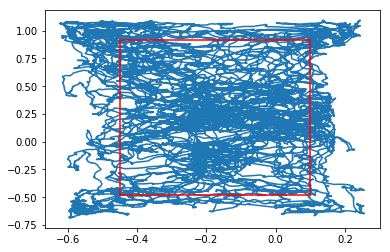

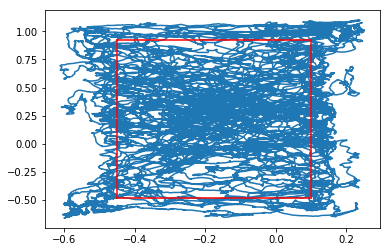

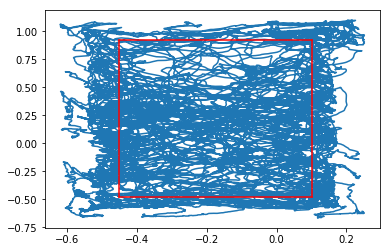

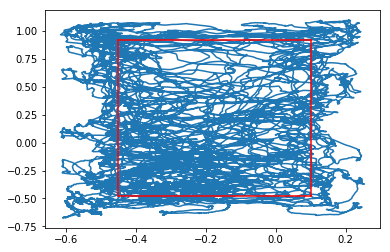

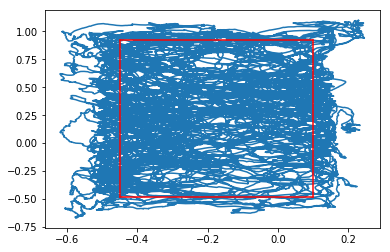

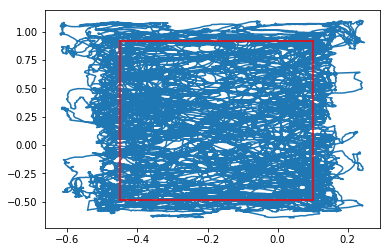

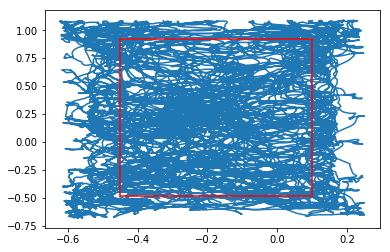

ValueError: max() arg is an empty sequence

In [81]:
beacons = [beacon_Day86_fs1,beacon_Day87_fs1,beacon_Day88_fs1,beacon_Day89_fs1,beacon_Day90_fs1,beacon_Day91_fs1,beacon_Day92_fs1,beacon_Day93_fs1,beacon_Day86_fs2,beacon_Day87_fs2,beacon_Day88_fs2,beacon_Day89_fs2,beacon_Day90_fs2,beacon_Day91_fs2,beacon_Day92_fs2,beacon_Day93_fs2]
 
list_of_days = [Day86_fs1,Day87_fs1,Day88_fs1,Day89_fs1,Day90_fs1,Day91_fs1,Day92_fs1,Day93_fs1,Day86_fs2,Day87_fs2,Day88_fs2,Day89_fs2,Day90_fs2,Day91_fs2,Day92_fs2,Day93_fs2]

borderless = []
for day, beacon in zip(list_of_days,beacons):
    borderless.append(np.asarray(Borderless_histogram(day,beacon,cut=0)))
    

## There is a bug due to the rotation function - so everytime it is run it rotates by antoher 5 degree - need ot fix that first!  would need to call the base data first all the time- need to read raw data everytime or read from processed file 

### 1. make proper rotation function 
2. 

### Extensions: 
    One could also just ask when does the trajectory reach a border and then plot the lenght of the trajectories before being borderless. 


### Graveyard

In [ ]:
minx=[]
miny=[]
maxx=[]
maxy=[]
for day in list_of_days and list_of_days2:
    minx.append(min(rotation_correction(day)[1]))
    miny.append(min(rotation_correction(day)[3]))
    maxx.append(max(rotation_correction(day)[1]))
    maxy.append(max(rotation_correction(day)[3]))
min_x = np.median(minx)
min_y = np.median(miny)
max_x = np.median(maxx)
max_y = np.median(maxy)
x_dist=(min_x - max_x)*-1
y_dist=(min_y - max_y)*-1
fig,ax= plt.subplots(2,2)
fig.suptitle('distribution of minimums and maximums (X,Y) across sessions')
ax[0,0].hist(minx)
ax[0,1].hist(miny)
ax[1,0].hist(maxx)
ax[1,1].hist(maxy)


print('Minimum X:%.2f Minimum Y:%.2f Maximum X:%.2f Maximum Y:%.2f ' %(min_x, min_y,max_x,max_y)  )
print( 'X dist =%.2f Y dist = %.2f' %(y_dist,x_dist) )
print (maxx)
print (maxy)


In [80]:
#All imports 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
from matplotlib.patches import Circle
import matplotlib.tri as tri
import numpy as np
from scipy.spatial.transform import Rotation as R
import math

root = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Data/Raw/'
figures = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Figures/'

#Data with beacon metadata
beacon_Day86_fs2 = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)
beacon_Day86_fs1 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)

beacon_Day87_fs2 = pd.read_csv(root+'beacons 20200129-153534.txt',sep=" ", header=None)
beacon_Day87_fs1 = pd.read_csv(root+'beacons 20200129-161806.txt',sep=" ", header=None)

beacon_Day88_fs2 = pd.read_csv(root+'beacons 20200130-102126.txt',sep=" ", header=None)
beacon_Day88_fs1 = pd.read_csv(root+'beacons 20200130-111741.txt',sep=" ", header=None)

beacon_Day89_fs2 = pd.read_csv(root+'beacons 20200130-161126.txt',sep=" ", header=None)
beacon_Day89_fs1 = pd.read_csv(root+'beacons 20200130-151829.txt',sep=" ", header=None)

beacon_Day90_fs2 = pd.read_csv(root+'beacons 20200203-154441.txt',sep=" ", header=None)
beacon_Day90_fs1 = pd.read_csv(root+'beacons 20200203-145842.txt',sep=" ", header=None)

beacon_Day91_fs2 = pd.read_csv(root+'beacons 20200204-125552.txt',sep=" ", header=None)
beacon_Day91_fs1 = pd.read_csv(root+'beacons 20200204-133905.txt',sep=" ", header=None)

beacon_Day92_fs2 = pd.read_csv(root+'beacons 20200205-143220.txt',sep=" ", header=None)
beacon_Day92_fs1 = pd.read_csv(root+'beacons 20200205-151052.txt',sep=" ", header=None)

beacon_Day93_fs2 = pd.read_csv(root+'beacons 20200206-133529.txt',sep=" ", header=None)
beacon_Day93_fs1 = pd.read_csv(root+'beacons 20200206-125706.txt',sep=" ", header=None)



Day46_fs1 = pd.read_csv(root+'position 20190923-174441.txt',sep=" ", header=None)
Day46_fs2 = pd.read_csv(root+'position 20190923-171112.txt',sep=" ", header=None)
Day47_fs1 = pd.read_csv(root+'position 20191001-112411.txt',sep=" ", header=None)
Day47_fs2 = pd.read_csv(root+'position 20191001-115127.txt',sep=" ", header=None)
Day48_fs1 = pd.read_csv(root+'position 20191002-115000.txt',sep=" ", header=None)
Day48_fs2 = pd.read_csv(root+'position 20191002-111038.txt',sep=" ", header=None)
Day51_fs1 = pd.read_csv(root+'position 20191106-170809.txt',sep=" ", header=None)
Day52_fs2 = pd.read_csv(root+'position 20191107-174215.txt',sep=" ", header=None)
Day52_fs1 = pd.read_csv(root+'position 20191107-183857.txt',sep=" ", header=None)
Day53_fs2 = pd.read_csv(root+'position 20191108-142321.txt',sep=" ", header=None)
Day53_fs1 = pd.read_csv(root+'position 20191108-145125.txt',sep=" ", header=None)
Day66_fs1 = pd.read_csv(root+'position 20191118-161325.txt',sep=" ", header=None)
Day66_fs2 = pd.read_csv(root+'position 20191118-171209.txt',sep=" ", header=None)
Day72_fs1 = pd.read_csv(root+'position 20191127-122008.txt',sep=" ", header=None)
Day72_fs2 = pd.read_csv(root+'position 20191127-132223.txt',sep=" ", header=None)


Day79_fs2 = pd.read_csv(root+'position 20200121-154004.txt',sep=" ", header=None)
Day79_fs1 = pd.read_csv(root+'position 20200121-161359.txt',sep=" ", header=None)

Day80_fs2 = pd.read_csv(root+'position 20200122-141738.txt',sep=" ", header=None)
Day80_fs1 = pd.read_csv(root+'position 20200122-133022.txt',sep=" ", header=None)

Day81_fs2 = pd.read_csv(root+'position 20200123-141930.txt',sep=" ", header=None)
Day81_fs1 = pd.read_csv(root+'position 20200123-150059.txt',sep=" ", header=None)

Day82_fs2 = pd.read_csv(root+'position 20200124-151642.txt',sep=" ", header=None)
Day82_fs1 = pd.read_csv(root+'position 20200124-160826.txt',sep=" ", header=None)

Day83_fs2 = pd.read_csv(root+'position 20200126-183810.txt',sep=" ", header=None)
Day83_fs1 = pd.read_csv(root+'position 20200126-180200.txt',sep=" ", header=None)

Day84_fs2 = pd.read_csv(root+'position 20200127-205615.txt',sep=" ", header=None)
Day84_fs1 = pd.read_csv(root+'position 20200127-155645.txt',sep=" ", header=None)

Day85_fs2 = pd.read_csv(root+'position 20200128-112255.txt',sep=" ", header=None)
Day85_fs1 = pd.read_csv(root+'position 20200128-104637.txt',sep=" ", header=None)

Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

Day87_fs2 = pd.read_csv(root+'position 20200129-153534.txt',sep=" ", header=None)
Day87_fs1 = pd.read_csv(root+'position 20200129-161806.txt',sep=" ", header=None)

Day88_fs2 = pd.read_csv(root+'position 20200130-102126.txt',sep=" ", header=None)
Day88_fs1 = pd.read_csv(root+'position 20200130-111741.txt',sep=" ", header=None)

Day89_fs2 = pd.read_csv(root+'position 20200130-161126.txt',sep=" ", header=None)
Day89_fs1 = pd.read_csv(root+'position 20200130-151829.txt',sep=" ", header=None)

Day90_fs2 = pd.read_csv(root+'position 20200203-154441.txt',sep=" ", header=None)
Day90_fs1 = pd.read_csv(root+'position 20200203-145842.txt',sep=" ", header=None)

Day91_fs2 = pd.read_csv(root+'position 20200204-125552.txt',sep=" ", header=None)
Day91_fs1 = pd.read_csv(root+'position 20200204-133905.txt',sep=" ", header=None)

Day92_fs2 = pd.read_csv(root+'position 20200205-143220.txt',sep=" ", header=None)
Day92_fs1 = pd.read_csv(root+'position 20200205-151052.txt',sep=" ", header=None)

Day93_fs2 = pd.read_csv(root+'position 20200206-133529.txt',sep=" ", header=None)
Day93_fs1 = pd.read_csv(root+'position 20200206-125706.txt',sep=" ", header=None)
